post eu posto informação no servidor<br>
get eu pego informação do servidor. Posso ter esses códigos de status da minha requisição get:
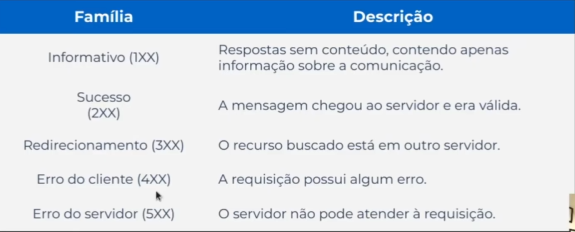

In [1]:
import requests

In [4]:
response = requests.get('https://www.walissonsilva.com/')
print(response.status_code)

200


In [12]:
print(response.headers) # retorna todo o header do meu site


{'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'x-matched-path': '/', 'cache-control': 'private, no-cache, no-store, max-age=0, must-revalidate', 'date': 'Wed, 04 May 2022 14:33:20 GMT', 'x-powered-by': 'Next.js', 'etag': 'W/"11772-ZK8iKadD9Mx+QxM15jAF4fQwhn8"', 'x-vercel-cache': 'MISS', 'age': '0', 'server': 'Vercel', 'x-vercel-id': 'gru1::iad1::9jr42-1651674799709-385e5900ec64', 'strict-transport-security': 'max-age=63072000', 'Content-Encoding': 'br'}


In [13]:
print(response.content) #retorna todo o body do meu site (conteúdo da página mesmo)

b'<!DOCTYPE html><html lang="pt-br"><head><link rel="icon" href="favicon.svg"/><link rel="preconnect" href="https://fonts.gstatic.com"/><link rel="stylesheet" data-href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700;800;900&amp;display=swap"/><link rel="stylesheet" data-href="https://fonts.googleapis.com/css2?family=JetBrains+Mono:wght@300;400;500;600;700&amp;display=swap"/><script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-119877615-1"></script><script src="/js/analytics.js"></script><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><meta name="description" content="Site pessoal com informa\xc3\xa7\xc3\xb5es profissionais, projetos de portf\xc3\xb3lio, e blog sobre Desenvolvimento Web, Python e Ci\xc3\xaancia de Dados."/><meta property="og:title" content="Home | Walisson Silva"/><meta property="og:description" content="Site pessoal com informa\xc3\xa7\xc3\xb5es profissionais, projetos de portf\xc3\xb3lio, e blog so

### Extraindo uma notícia do g1

In [18]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://g1.globo.com/')
content = response.content
type(content)

bytes

In [20]:
site = BeautifulSoup(content, 'html.parser') # transformando o conteúdo de bytes para uma classe beatifulsoup

In [29]:
noticia = site.find('div',attrs = {'class':'feed-post-body'}) # procurar as tags que quero no site, no caso uma das noticias
print(noticia.prettify())

<div class="feed-post-body">
 <div class="feed-post-header with-post-chapeu">
  <span class="feed-post-header-chapeu">
   Presídio de segurança máxima
  </span>
 </div>
 <div class="feed-post-body-title gui-color-primary gui-color-hover">
  <div class="_evt">
   <a class="feed-post-link gui-color-primary gui-color-hover" elementtiming="text-ssr" href="https://g1.globo.com/rj/rio-de-janeiro/noticia/2022/05/04/em-bangu-1-sergio-cabral-passara-10-dias-em-uma-cela-de-5-metros-quadrados.ghtml">
    Cabral passará 10 dias em cela de 5 m² sem janelas e sem privada
   </a>
  </div>
 </div>
 <div class="feed-post-body-resumo" elementtiming="text-ssr">
  Ex-governador do RJ foi transferido para Bangu 1 após indícios de regalias no presídio da PM.
 </div>
 <div class="feed-media-wrapper">
  <a class="feed-post-figure-link gui-image-hover" href="https://g1.globo.com/rj/rio-de-janeiro/noticia/2022/05/04/em-bangu-1-sergio-cabral-passara-10-dias-em-uma-cela-de-5-metros-quadrados.ghtml">
   <div class

In [34]:
titulo = noticia.find('a', attrs={'class':'feed-post-link'}) #dentro da notícia, eu quero agora procurar algo, no caso o título da notícia
print(titulo)
print('\n')
print(titulo.text)

<a class="feed-post-link gui-color-primary gui-color-hover" elementtiming="text-ssr" href="https://g1.globo.com/rj/rio-de-janeiro/noticia/2022/05/04/em-bangu-1-sergio-cabral-passara-10-dias-em-uma-cela-de-5-metros-quadrados.ghtml">Cabral passará 10 dias em cela de 5 m² sem janelas e sem privada</a>


Cabral passará 10 dias em cela de 5 m² sem janelas e sem privada


In [36]:
subtitulo = noticia.find('div', attrs = {'class':'feed-post-body-resumo'})
print(subtitulo)
print('\n')
print(subtitulo.text)

<div class="feed-post-body-resumo" elementtiming="text-ssr">Ex-governador do RJ foi transferido para Bangu 1 após indícios de regalias no presídio da PM.</div>


Ex-governador do RJ foi transferido para Bangu 1 após indícios de regalias no presídio da PM.


### Extraindo várias notícias do g1

In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get('https://g1.globo.com/')
content = response.content

site = BeautifulSoup(content, 'html.parser') # transformando o conteúdo de bytes para uma classe beatifulsoup
noticias = site.findAll('div',attrs = {'class':'feed-post-body'}) # procurar todas as tags que quero no site, no caso uma das noticias. Returna algo
# tipo uma lista, só que do beutifulsoup

lista_noticias = [];
for noticia in noticias:
    titulo = noticia.find('a', attrs={'class':'feed-post-link'}) #dentro da notícia, eu quero agora procurar algo, no caso o título da notícia
    #print(titulo.text)
    #print(titulo['href']+'\n')#href dá o link da notícia, toda tag "a" tem um link

    subtitulo = noticia.find('div', attrs = {'class':'feed-post-body-resumo'})
    if (subtitulo):
        lista_noticias.append([titulo.text, subtitulo.text, titulo['href']]) #salvando titulo, subtitulo e link numa lista de listas
        #print(subtitulo.text)
    else:
        lista_noticias.append([titulo.text, titulo['href']])
        
    #print('--------------')

news = pd.DataFrame(lista_noticias, columns = ['Título','Subtítulo','Link'])
news.to_excel('noticias.xlsx', index = False)
print(news)

                                              Título  \
0  Cabral passará 10 dias em cela de 5 m² sem jan...   
1  PSB expulsa vereador de SP após a fala racista...   
2  Comissão aprova texto que pode levar aliados d...   
3  'Bandido que levantar arma pra polícia vai lev...   
4  Telescópio captura 'dança' de galáxias em proc...   
5  VÍDEO: helicóptero captura parte de foguete no ar   
6  Invasão de formigas, tombo da Pabllo, foguete ...   
7  Perda do poder de compra: tabela mostra quanto...   
8  TSE insistirá em trazer observadores europeus ...   

                                           Subtítulo  \
0  Ex-governador do RJ foi transferido para Bangu...   
1  https://g1.globo.com/sp/sao-paulo/noticia/2022...   
2  Proposta, que já passou na Câmara, eleva para ...   
3  Garcia anunciou medidas para coibir assaltos d...   
4  https://g1.globo.com/ciencia/noticia/2022/05/0...   
5  Missão não foi totalmente bem-sucedida porque ...   
6  https://g1.globo.com/playlist/videos-para-as

## Observe que com o beatifulsoup eu consigo só pegar o conteúdo estático da pagina, enquanto que se eu quiser pegar o conteúdo dinâmico(as notícias depois de rolar a pagina, por exemplo), preciso usar o selenium.